<a href="https://colab.research.google.com/github/Zainab26mahj/Object-Detection/blob/main/Fake_News_Detection_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [19]:
import pandas as pd #data manipulation
import re #strings manipulation
import matplotlib.pyplot as plt #basic visualisation
import seaborn as sns #fancy visualisation
from sklearn.model_selection import train_test_split #split data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer #Term Frequency-Inverse Document Frequency, and it's a numerical statistic that reflects how important a word is to a document in a collection
from sklearn.linear_model import LogisticRegression #the outcome belongs to either 0 or 1
from sklearn.ensemble import RandomForestClassifier #a collection of decision trees
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #evaluation methods for labeled data
import pickle #used tp convert a Python object into bytes and vice-versa
import gradio as gr #

In [8]:
#Data exploration
data = pd.read_csv("https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv", delimiter='\t', header=None)
data.columns = ['text', 'label']

print("Original Data Sample:\n", data.head())
print("Number of original documents:", len(data))

print("Class Distribution:\n", data['label'].value_counts())

Original Data Sample:
                                                 text  label
0  a stirring , funny and finally transporting re...      1
1  apparently reassembled from the cutting room f...      0
2  they presume their audience wo n't sit still f...      0
3  this is a visually stunning rumination on love...      1
4  jonathan parker 's bartleby should have been t...      1
Number of original documents: 6920
Class Distribution:
 label
1    3610
0    3310
Name: count, dtype: int64


There are 3610 positive news and 3310 false news.

In [9]:
# Data Cleaning by manipulating the strings and removing unnecessary spaces and special characters and converting to lowercase
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.lower()
        return text.strip()
    else:
        return ""

In [10]:
#Apply the cleaning function and see how many documents are left
data['clean_text'] = data['text'].apply(clean_text)
data = data[data['clean_text'].str.strip() != '']
print(f"Number of documents after removing empty: {len(data)}")
data['text_length'] = data['clean_text'].apply(len)
print("Text length distribution:\n", data['text_length'].describe())

Number of documents after removing empty: 6920
Text length distribution:
 count    6920.000000
mean       98.659827
std        49.961872
min         2.000000
25%        60.000000
50%        95.000000
75%       132.000000
max       258.000000
Name: text_length, dtype: float64


In [11]:
#The text data is converted into numerical features using TF-IDF, then split into training and testing sets.
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', min_df=1, max_df=0.95)

X = tfidf.fit_transform(data['clean_text']).toarray()

print(f"Vocabulary size: {len(tfidf.get_feature_names_out())}")

y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#A Logistic Regression model is trained on the training data and used to predict labels for the test data.
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

Vocabulary size: 5000


Logistic Regression Accuracy: 0.7620423892100193
Confusion Matrix:
 [[683 309]
 [185 899]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73       992
           1       0.74      0.83      0.78      1084

    accuracy                           0.76      2076
   macro avg       0.77      0.76      0.76      2076
weighted avg       0.76      0.76      0.76      2076

Random Forest Accuracy: 0.7196531791907514
Confusion Matrix:
 [[695 297]
 [285 799]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       992
           1       0.73      0.74      0.73      1084

    accuracy                           0.72      2076
   macro avg       0.72      0.72      0.72      2076
weighted avg       0.72      0.72      0.72      2076



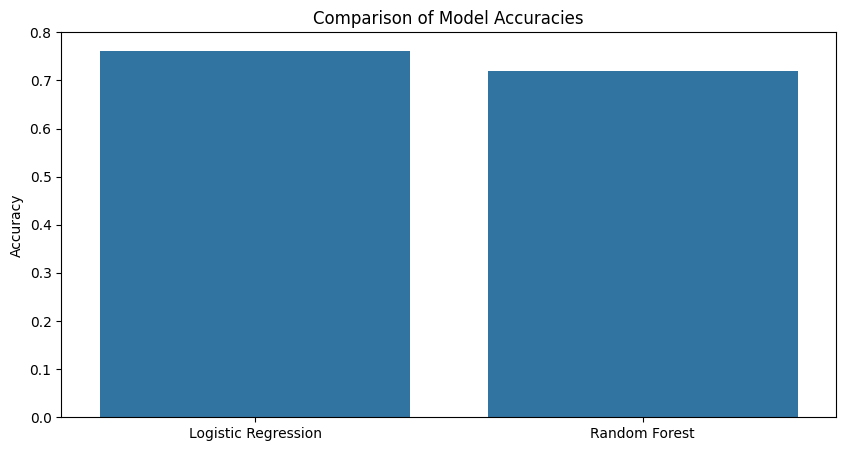

In [12]:
# Evaluation of the Logistic Regression Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))

# Create a Random Forest Classifier as another option
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluation of the Random Forest Model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Visualisation and comparison of the Results
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, rf_predictions)]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

The Logistic Regression model had an accuracy of 76% whereas the Random Forest had an accuracy of 72%. Both the models have decent performances but we will carry on with LR for the deployment.

In [15]:
with open('model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and TF-IDF vectorizer have been saved successfully.")

Model and TF-IDF vectorizer have been saved successfully.


In [20]:
# Function to classify if the news are true or false
def analyze_sentiment(text):
    cleaned_text = re.sub(r'\W', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()
    tfidf_text = tfidf_vectorizer.transform([cleaned_text]).toarray()
    prediction = model.predict(tfidf_text)[0]
    return "True" if prediction == 1 else "Fake"

# Create Gradio interface
interface = gr.Interface(fn=analyze_sentiment, inputs="text", outputs="text")
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fc6d36de752875c722.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
